In [136]:
!pip install gdown

In [137]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import gdown
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]



In [138]:
import pandas as pd
import gdown

file_url_x = 'https://drive.google.com/uc?id=1zPibZ2au0Vi8N8uodxcfLTOkDZkUZvAa'
file_name_x = 'water_potability.csv'

try:
    gdown.download(file_url_x, file_name_x, quiet=False)
    kislay_df = pd.read_csv(file_name_x)
    print("File downloaded and loaded successfully.")
except Exception as e:
    print("Error:", e)


Downloading...
From: https://drive.google.com/uc?id=1zPibZ2au0Vi8N8uodxcfLTOkDZkUZvAa
To: /content/water_potability.csv
100%|██████████| 525k/525k [00:00<00:00, 81.9MB/s]

File downloaded and loaded successfully.


In [139]:
kislay_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [140]:
kislay_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

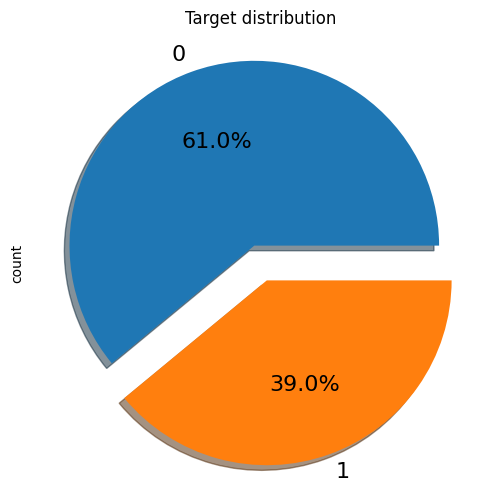

In [141]:


plt.figure(figsize=(6,6))

# Pie plot
kislay_df['Potability'].value_counts().plot.pie(explode=[0.1,0.1],
                    autopct='%1.1f%%', shadow=True,
                    textprops={'fontsize':16}).set_title("Target distribution");

In [142]:
cols=kislay_df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [143]:
#Replace null values based on the group/sample mean
kislay_df['ph']=kislay_df['ph'].fillna(kislay_df.groupby(['Potability'])['ph'].transform('mean'))
kislay_df['Sulfate']=kislay_df['Sulfate'].fillna(kislay_df.groupby(['Potability'])['Sulfate'].transform('mean'))
kislay_df['Trihalomethanes']=kislay_df['Trihalomethanes'].fillna(kislay_df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [144]:
kislay_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

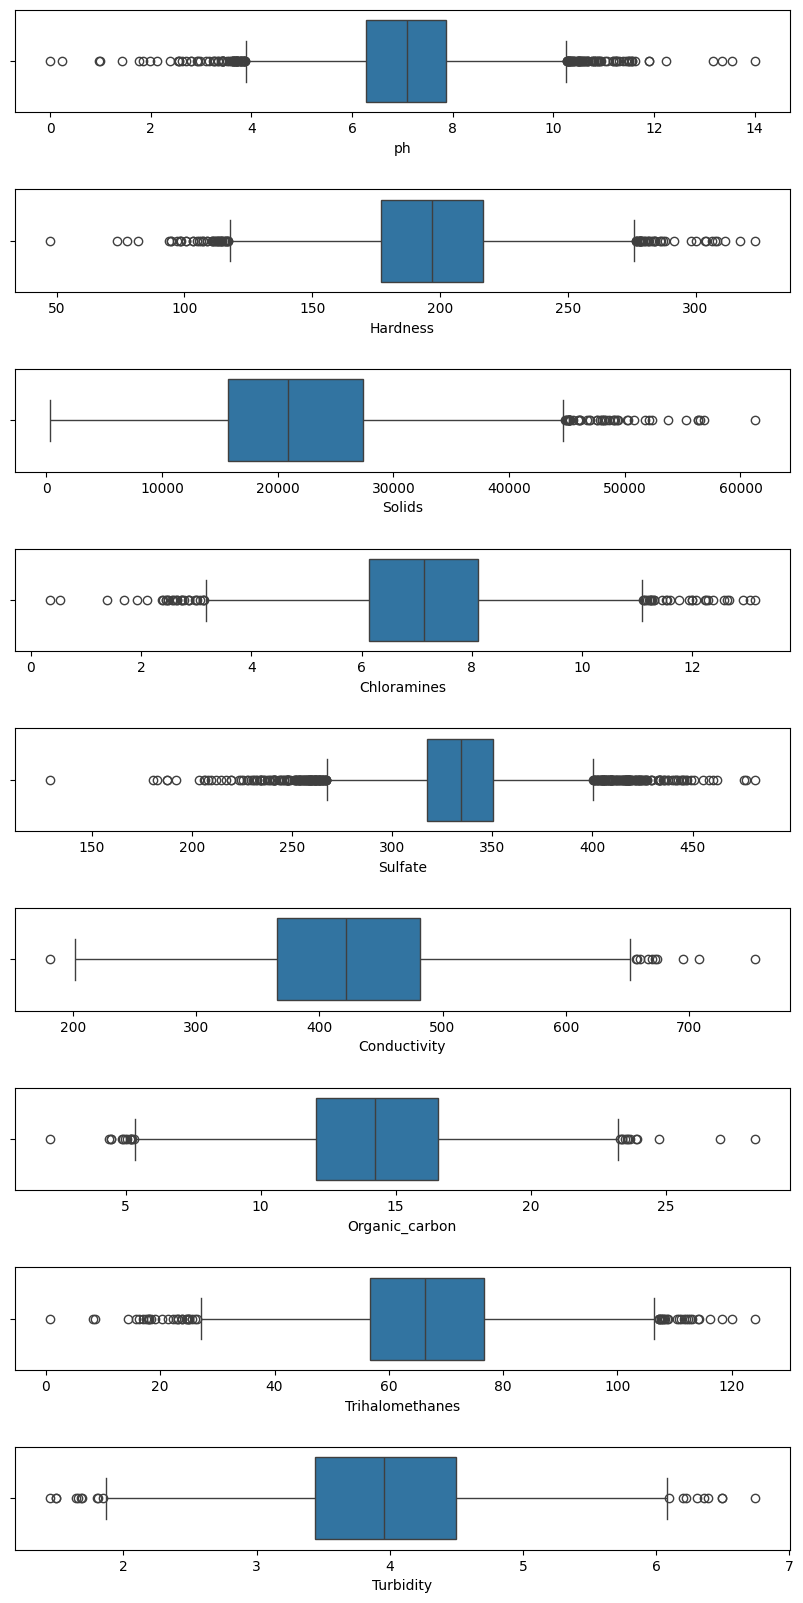

In [145]:
fig, ax = plt.subplots(9, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=0.75)
for i in range(9) :
    # Ax
    sns.boxplot(x=cols[i], data=kislay_df, ax=ax[i])

Hypothesis testing

p_value for ph is 0.8257362194511633 we accept the null hypothesis
p_value for Hardness is 0.42854158740864634 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074658 we accept the null hypothesis
p_value for Sulfate is 0.12292453703923875 we accept the null hypothesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is 0.675988889793878 we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


Text(6, 0.12, 'Significance level: 0.1')

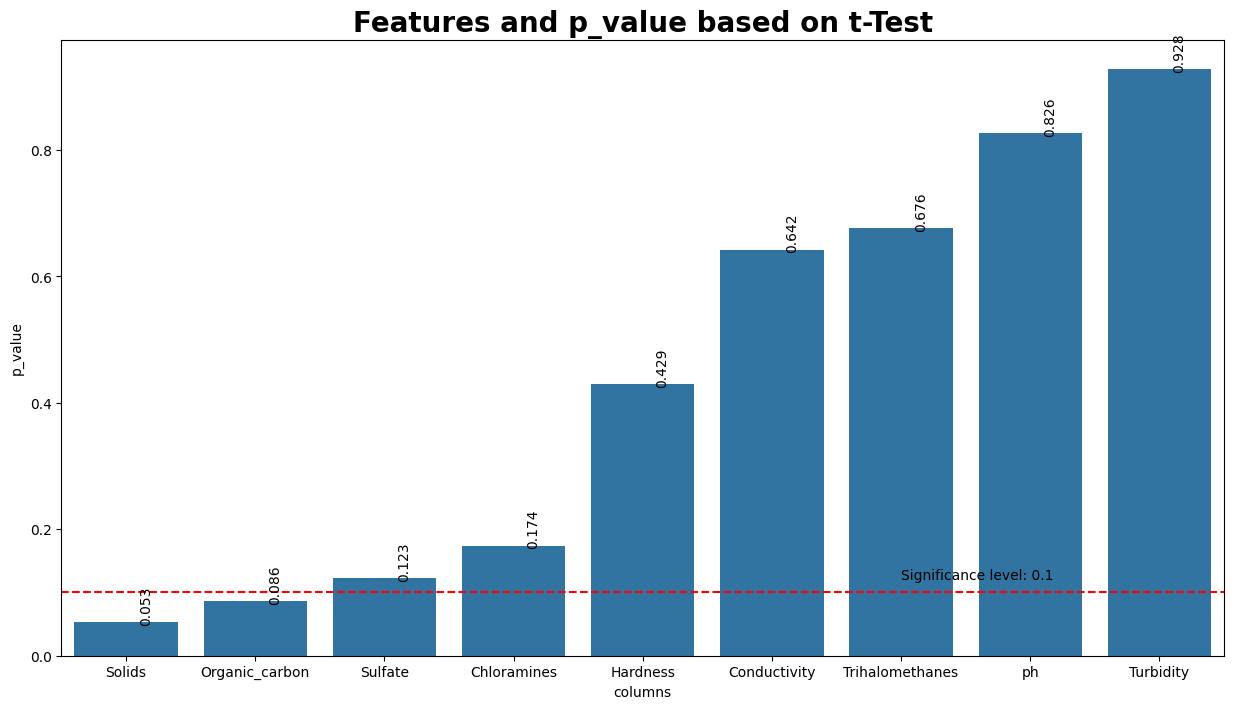

In [146]:
from scipy.stats import ttest_ind
p_val=[]
for i in cols:
    pota_1 = kislay_df[kislay_df['Potability']==1][i]
    pota_0 = kislay_df[kislay_df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

stats_test=pd.DataFrame(columns=['columns','p_value'])
stats_test['columns']=cols
stats_test['p_value']=p_val
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

fig=plt.figure(figsize=(15,8))
ax=sns.barplot(data=stats_test, x='columns',y='p_value')
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for i in ax.patches:
    ax.text(x=i.get_x()+0.5, y=i.get_height(), s=i.get_height(), rotation=90)
ax.axhline(y=0.1, color='red', ls='--')
ax.text(x=6, y=0.12, s="Significance level: 0.1")

PAIRPLOT

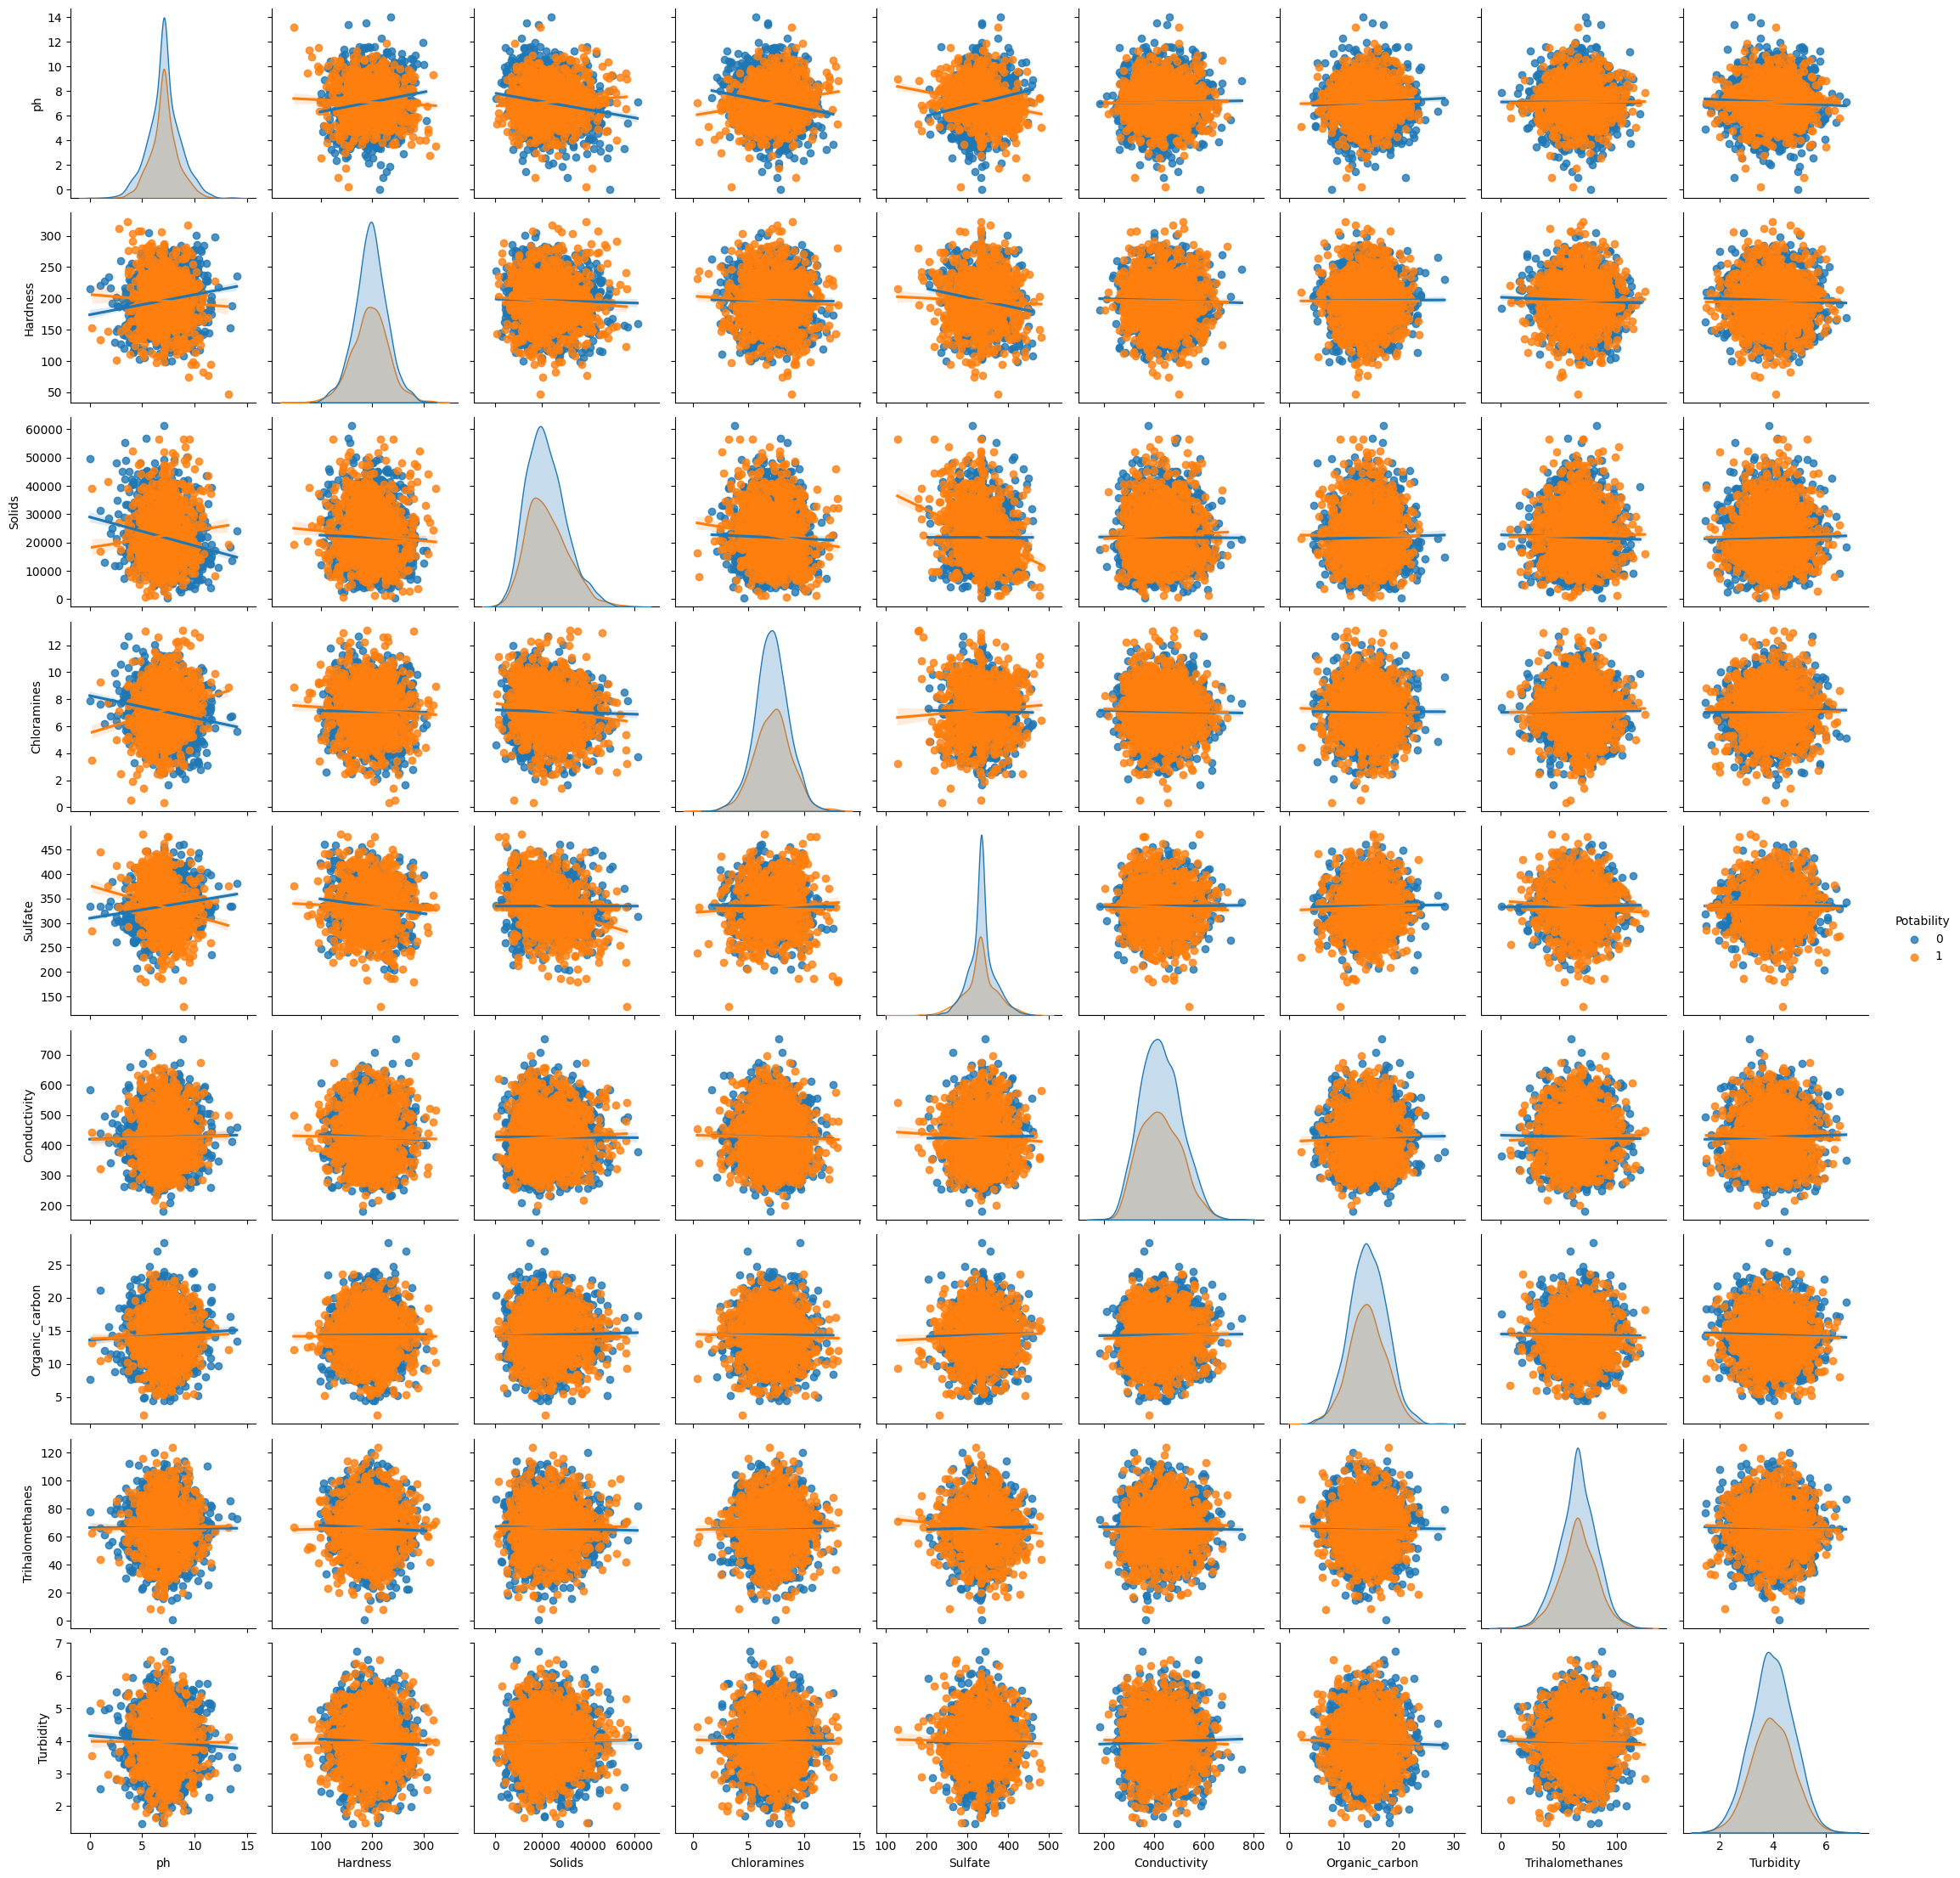

In [147]:
sns.pairplot(kislay_df, hue='Potability', kind='reg')

HEATMAPS

<Axes: >

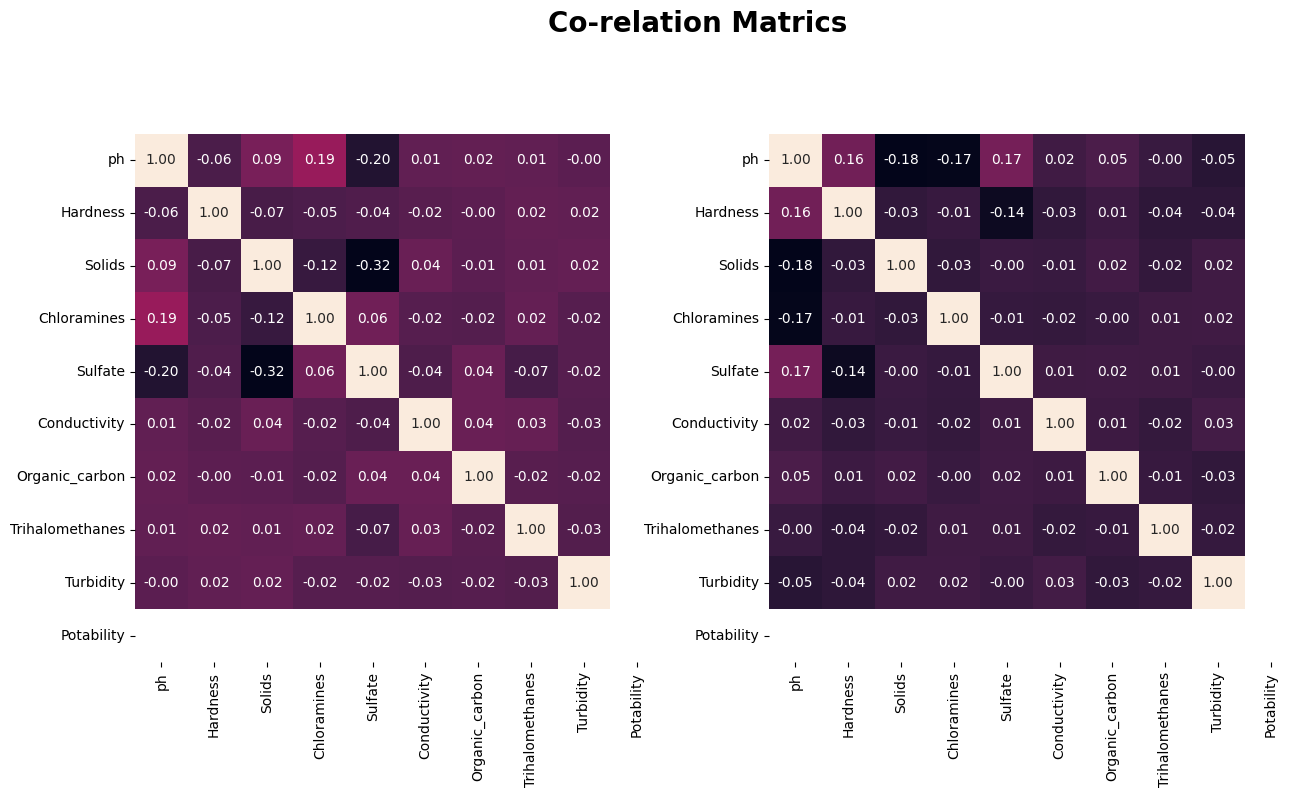

In [148]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(kislay_df[kislay_df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(kislay_df[kislay_df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

<Axes: >

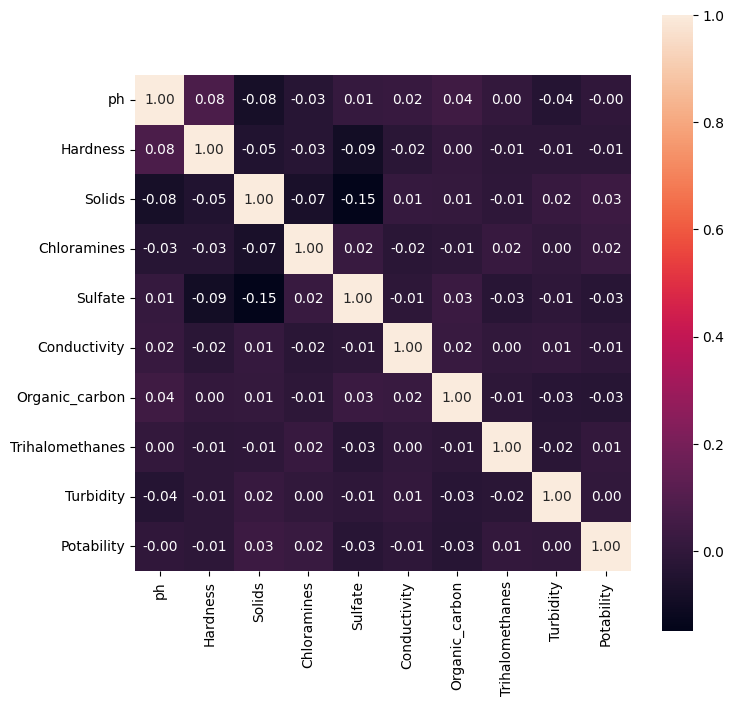

In [149]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(kislay_df.corr(), annot=True, fmt='0.2f', square=True)

In [150]:
X = kislay_df.drop(columns='Potability')
y = kislay_df.Potability

In [151]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

,min,mean,std,max
ph,0.000000,0.505775,0.104997,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581725,0.102678,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532668,0.127938,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


MODEL TRAINING

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1,random_state=45)

In [153]:
#split
from sklearn.model_selection import train_test_split

#score
from sklearn.metrics import precision_score, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
#models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

#Hyper-Parameter-Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [154]:
#finding the best models with base parameters
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Ridge', RidgeClassifier()),
    ('SGD Classifier', SGDClassifier(max_iter=1000, tol=1e-3)),
    ('Support Vector Classifier', SVC()),
    ('NuSVC', NuSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('Bernoulli NB', BernoulliNB()),
    ('Perc', Perceptron()),
    ('Nearest Centroid', NearestCentroid()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Ada Boost Classifier', AdaBoostClassifier()),
    ('XGB Classifier', XGBClassifier(verbosity = 0)),
    ('Passive Aggressive', PassiveAggressiveClassifier()),
    ('Bagging Classifier',BaggingClassifier()),
    ('GradientBoostingClassifier',GradientBoostingClassifier())
]


In [155]:
results = dict()
for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    precision = precision_score(y_test, pred)

    score = accuracy_score(y_test, pred)
    results[name] = score

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [156]:
df_results = pd.DataFrame([results])
df_results = df_results.transpose()
df_results = df_results.rename(columns={0:'Score'}).sort_values(by='Score',ascending=False)

In [157]:
df_results.style.set_properties(**{'background-color': '#DEF5E5',
                                    'color': 'black',
                                    'border': '0.5px  solid black'})

,Score
Random Forest Classifier,0.804878
Bagging Classifier,0.792683
XGB Classifier,0.780488
GradientBoostingClassifier,0.780488
Decision Tree,0.759146
Ada Boost Classifier,0.740854
Logistic Regression,0.600610
Ridge,0.600610
SGD Classifier,0.600610
Support Vector Classifier,0.600610


Confusion matrix and Classification reports

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       197
           1       0.80      0.60      0.69       131

    accuracy                           0.78       328
   macro avg       0.79      0.75      0.76       328
weighted avg       0.78      0.78      0.77       328



<Axes: >

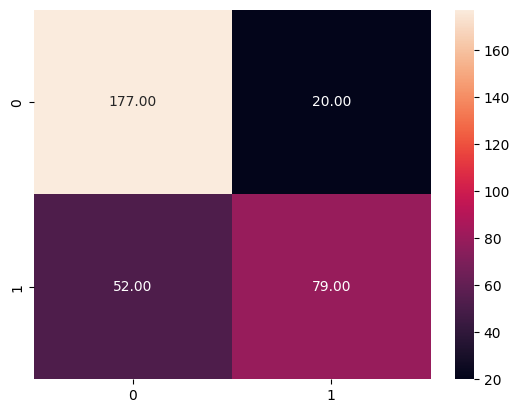

In [158]:
from sklearn.metrics import classification_report, confusion_matrix
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       197
           1       0.79      0.65      0.71       131

    accuracy                           0.79       328
   macro avg       0.79      0.77      0.77       328
weighted avg       0.79      0.79      0.79       328



<Axes: >

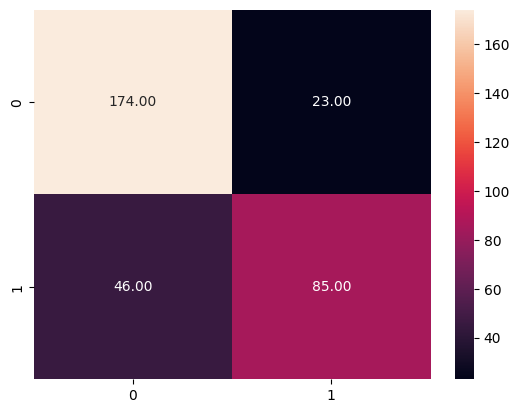

In [159]:
from sklearn.metrics import classification_report, confusion_matrix
model = BaggingClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       197
           1       0.83      0.64      0.72       131

    accuracy                           0.80       328
   macro avg       0.81      0.78      0.79       328
weighted avg       0.81      0.80      0.80       328



<Axes: >

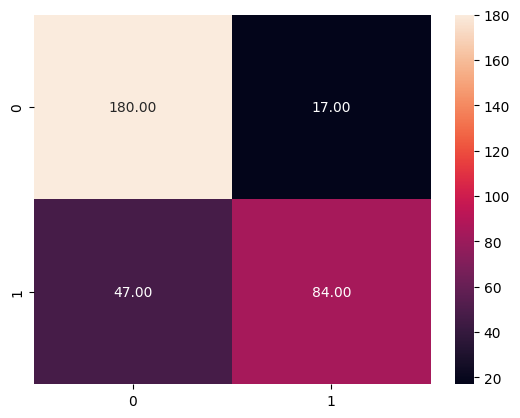

In [160]:
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       197
           1       0.77      0.50      0.60       131

    accuracy                           0.74       328
   macro avg       0.75      0.70      0.71       328
weighted avg       0.75      0.74      0.73       328



<Axes: >

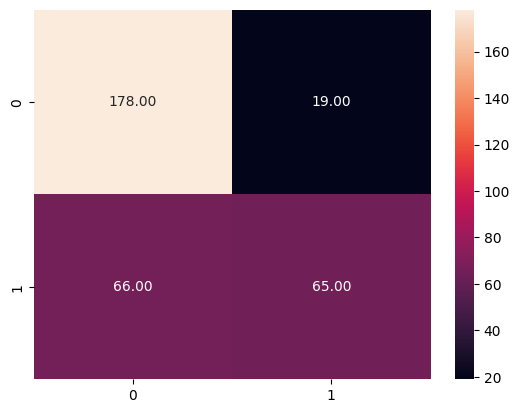

In [161]:
from sklearn.metrics import classification_report, confusion_matrix
model = AdaBoostClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       197
           1       0.76      0.66      0.70       131

    accuracy                           0.78       328
   macro avg       0.78      0.76      0.77       328
weighted avg       0.78      0.78      0.78       328



<Axes: >

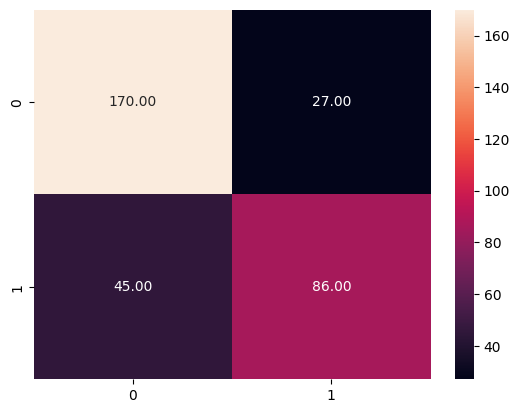

In [162]:
from sklearn.metrics import classification_report, confusion_matrix
model = XGBClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       197
           1       0.40      0.44      0.42       131

    accuracy                           0.51       328
   macro avg       0.50      0.50      0.50       328
weighted avg       0.52      0.51      0.52       328



<Axes: >

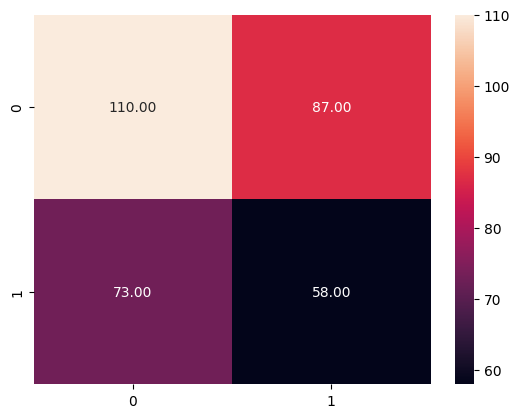

In [163]:
from sklearn.metrics import classification_report, confusion_matrix
model = NearestCentroid()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [164]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 5, 6, 7],
}

grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.798855860263014
Accuracy on test set: 0.8048780487804879


In [166]:


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2, 0.3],
}

# Create the AdaBoostClassifier
abc = AdaBoostClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(abc, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the accuracy of the best model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best parameters: {'learning_rate': 0.3, 'n_estimators': 150}
Best score: 0.7479727202094903
Accuracy on test set: 0.7560975609756098
